# Lecture One
---
[Overview text here]

## Definitions

- *Corpus* is a large body of text. (*plural corpora*)
- A *partial derivative* is the rate at which a multivariable function changes with respect to one variable while keeping the other variables constant. In simple terms, a partial derivative tells you how a change in one thing affects something else, while keeping everything else the same.

## 1. Introduction

---
Natural Language Processing (NLP) is a field of artificial intelligence focused on the interaction between computers and human (natural) languages. It involves tasks such as understanding, interpreting, and generating human language in a way that is meaningful.

**Early NLP** systems primarily focused on rule-based approaches and symbolic methods. A common early application was **machine translation**—automatically converting text from one language to another.

**Modern NLP** leverages machine learning, especially deep learning, to learn patterns in language. One major advance was moving from symbolic representations to **vector-based representations** of words and texts.

Retrieval-based neural networks, for example, can find passages in a document or dataset that are semantically similar to a given query (e.g., *YONO Lee et al., 2021*). These networks rely heavily on the concept of **word vectors** or **embeddings** to represent meaning.

**Traditional NLP Approaches**

Before word embeddings became popular, several techniques were used to represent language:

- *WordNet*: A large lexical database of English where words are grouped into sets of synonyms (synsets). It’s structured more like a thesaurus or dictionary.

- *One-Hot Encoding*: Each word is represented as a vector the size of the vocabulary, where only one dimension is 'hot' (1) and the rest are zero. This approach is sparse and does not capture semantic similarity between words.



## 2 Word Vectors (Embeddings)
---

**Word vectors**, also known as **word embeddings** or **word representations**, represent each word as a **dense vector** in a continuous vector space. Words with similar meanings are represented by similar vectors.

This idea builds on the **distributional hypothesis**:  
> *“You shall know a word by the company it keeps.”* – J.R. Firth

That is, words that appear in similar contexts tend to have similar meanings.

### Properties of Word Vectors:

- **Dense Representation**: Unlike one-hot vectors, embeddings are low-dimensional (e.g., 100–300 dimensions) and dense (most values are non-zero).
- **Semantic Similarity**: Words like *king* and *queen* or *apple* and *orange* will have similar vector representations.
- **Vector Arithmetic**: Embeddings capture analogical relationships, e.g.: vec("king") - vec("man") + vec("woman") ≈ vec("queen")

### Measuring Similarity

- **Cosine Similarity** and **Dot Product** are common ways to measure similarity between vectors.
- **Dot product**: High if vectors point in the same direction.
- **Cosine similarity**: Measures the cosine of the angle between two vectors (normalized dot product).

A python example of how to calculate similarity between two word vectors:

```python
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

similarity = cosine_similarity(vec("cat"), vec("dog"))
```

### Popular Word Embedding Models

- **Word2Vec** (Mikolov et al., 2013)
- **GloVe** (Global Vectors for Word Representation – Pennington et al., 2014)
- **FastText** (by Facebook AI, includes subword information)

### Transition to Contextual Embeddings

While word vectors assign a single vector to each word regardless of context, newer models like **BERT**, **GPT**, and **ELMo** generate **contextual embeddings**, where the vector for a word changes depending on its surrounding context.

## 3. Word2Vec
---

**Word2vec** is a framework for learning word vectors (Mikolov et al. 2013), idea:
- We have a large corpus (“body”) of text: a long list of words
- Every word in a fixed vocabulary is represented by a vector
- Go through each position t in the text, which has a center word c and context (“outside”) words o
- Use the similarity of the word vectors for c and o to calculate the probability of o given c (or vice versa)
- Keep adjusting the word vectors to maximize this probability

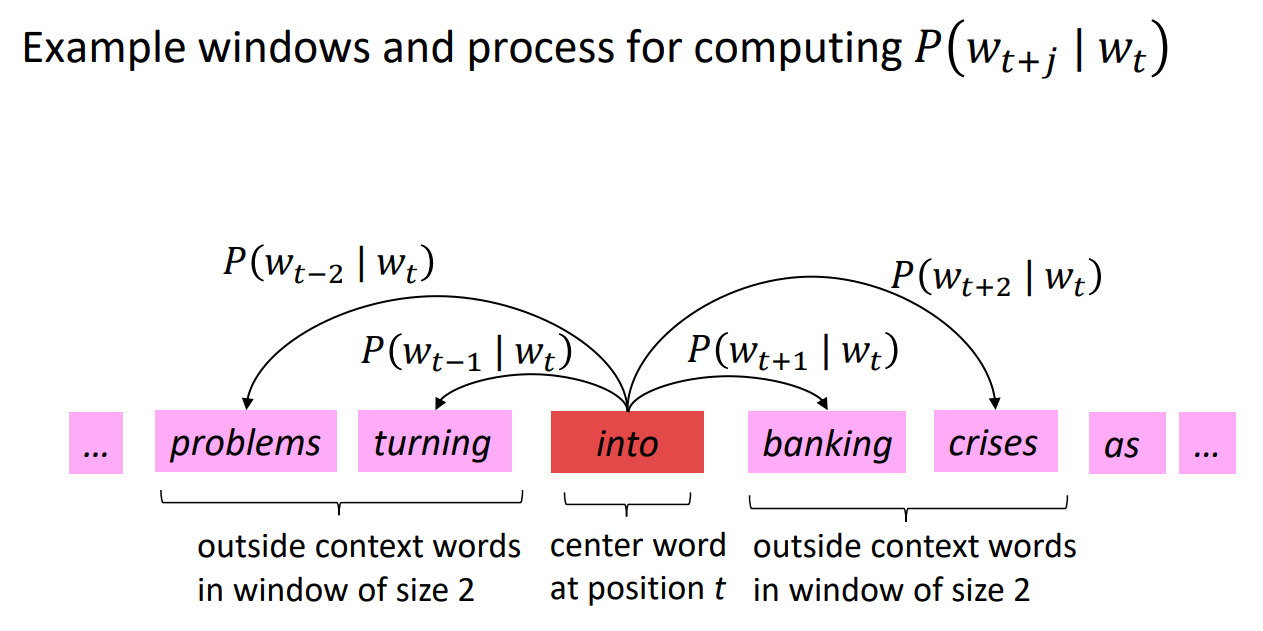




### Word2Vec: Objective Function Explained

#### What is Word2Vec Trying to Do?

Word2Vec is a model designed to learn **vector representations of words** (word embeddings) such that words appearing in similar contexts have similar vectors.

It uses a **sliding window** approach over a text corpus to learn from the context of each word. For each center word $w_t$, it tries to predict surrounding context words $w_{t+j}$ where $j$ ranges over a window of size $m$ (e.g., $-2 ≤ j ≤ 2$, excluding $j = 0$).

---

#### Step 1: Define Likelihood

For a given sequence of words, we define the **likelihood** of predicting the correct context words given the center word:

$$
L(\theta) = \prod_{t=1}^{T} \prod_{\substack{-m \leq j \leq m \\ j \neq 0}} P(w_{t+j} \mid w_t; \theta)
$$

Where:
- $T$ is the total number of words.
- $m$ is the window size.
- $θ$ represents all the parameters to optimize (i.e., word vectors).
- This is sometimes called a **cost** or **loss** function.

#### Step 2: Define the Objective Function

The objective function is the **average negative log-likelihood**, which we aim to **minimize**.

$$
J(\theta) = -\frac{1}{T} \log L(\theta) = -\frac{1}{T} \sum_{t=1}^{T} \sum_{\substack{-m \leq j \leq m \\ j \neq 0}} \log P(w_{t+j} \mid w_t; \theta)
$$

Minimizing this function is equivalent to **maximizing the predictive accuracy** of the model.

#### Step 3: How is $ P(w_{t+j} \mid w_t; \theta) $ Calculated?

##### Dual Vector Representation:

Each word $w$ has **two separate vectors**:
- $ v_w $: used when $w$ is the **center word**.
- $ u_w $: used when $w$ is the **context word**.

These are both learnable parameters and part of $θ$.

##### Softmax Probability:

So, to calculate the probability of a context word $o$ given a center word $c$, Word2Vec uses the **softmax function**:

$$
P(o \mid c) = \frac{\exp(u_o^\top v_c)}{\sum_{w \in V} \exp(u_w^\top v_c)}
$$

Where:
- $V$ is the vocabulary.
- $ u_o^\top v_c $ is the **dot product** between the context word vector and center word vector.
- The softmax ensures it's a valid probability distribution.

##### What This Means:

1. **Dot Product**:  
   $ u_o^\top v_c $ compares the similarity between the context word $o$ and the center word $c$.  
   If they are similar (i.e., appear together often), this dot product is large.

2. **Exponentiation**:  
   $ \exp(x) $ makes all values positive. This helps in interpreting them as probabilities.

3. **Normalization (Softmax)**:  
   The denominator sums over **all words in the vocabulary** to ensure the result is a **valid probability distribution** (i.e., values between 0 and 1 that sum to 1).

#### The Softmax Function

The softmax function is commonly used in deep learning to turn arbitrary numbers into probabilities:

$$
\text{softmax}(x_i) = \frac{\exp(x_i)}{\sum_{j=1}^{n} \exp(x_j)} = p_i
$$

##### In Plain English:

- It takes a list of values (like scores or dot products) and **emphasizes the largest ones**.
- The biggest score gets the highest probability.
- Smaller scores still get some probability — that's why it's called "**soft**" max.
- It’s called “max” because it **amplifies the largest value**, and “soft” because it doesn’t completely ignore the others.

This function is what allows Word2Vec to **predict one correct word** among thousands in the vocabulary by assigning probabilities.

- The prediction function in Word2Vec uses the **dot product** to measure similarity between words.
- It passes those values through **softmax** to get probabilities.
- Softmax ensures we can interpret the model’s outputs as **“how likely is this word to be nearby?”**
  
#### In Simple Terms:

Imagine Word2Vec is trying to **guess which words appear near a given word**. It tries to get better at this guessing by **adjusting vectors** so that:
- Words that appear in similar places end up with similar vectors.
- The model learns from lots of examples in a large text corpus.

The objective function helps guide this learning process:
- When the model makes a correct prediction, the loss is small.
- When it's wrong, the loss is large.
- Training updates the vectors to reduce the overall loss.

#### Summary

- Word2Vec is trained to predict surrounding words (context) from a center word.
- It learns by minimizing the negative log-likelihood of correct predictions.
- It represents words with two types of vectors and uses softmax to compute probabilities.
- Result: meaningful word embeddings based on context.



### To Train the Word2Vec Model

- Recall: θ (sometimes written as α) represents **all model parameters** — in our case, these are the word vectors.
- Specifically, we have:
  - A **center vector** $v_w$ for each word $w$
  - A **context vector** $u_w$ for each word $w$
  - So with a vocabulary of size $V$ and dimension $d$, we have $2 × V$ vectors of length $d$
- We train the model by **minimizing the negative log-likelihood loss function**, using **softmax** to compute prediction probabilities.
- This is done using **Stochastic Gradient Descent (SGD)**:
  - We compute the **gradient** of the loss with respect to each vector (both center and context).
  - Then we **update the vectors** using these gradients to make the model better at predicting context words.
- In practice, due to the large vocabulary size, we often use approximations like **negative sampling** or **hierarchical softmax** to make training more efficient.


## 4. Object Function
Note: Images below taken from the Stanford Lecture Slides

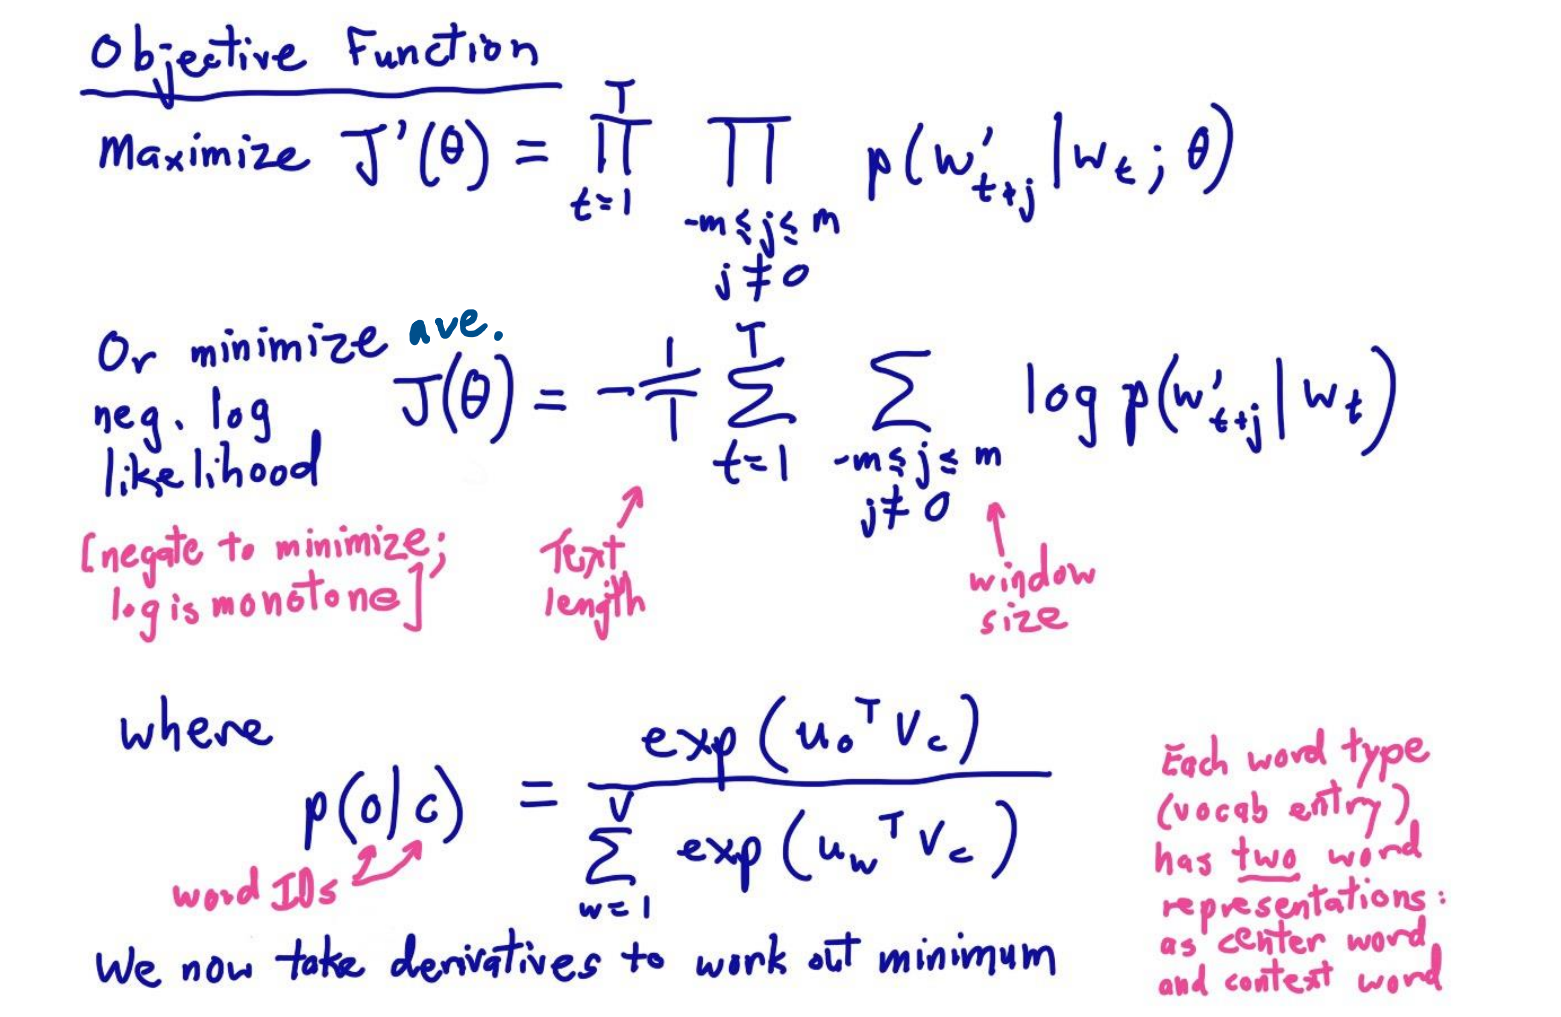

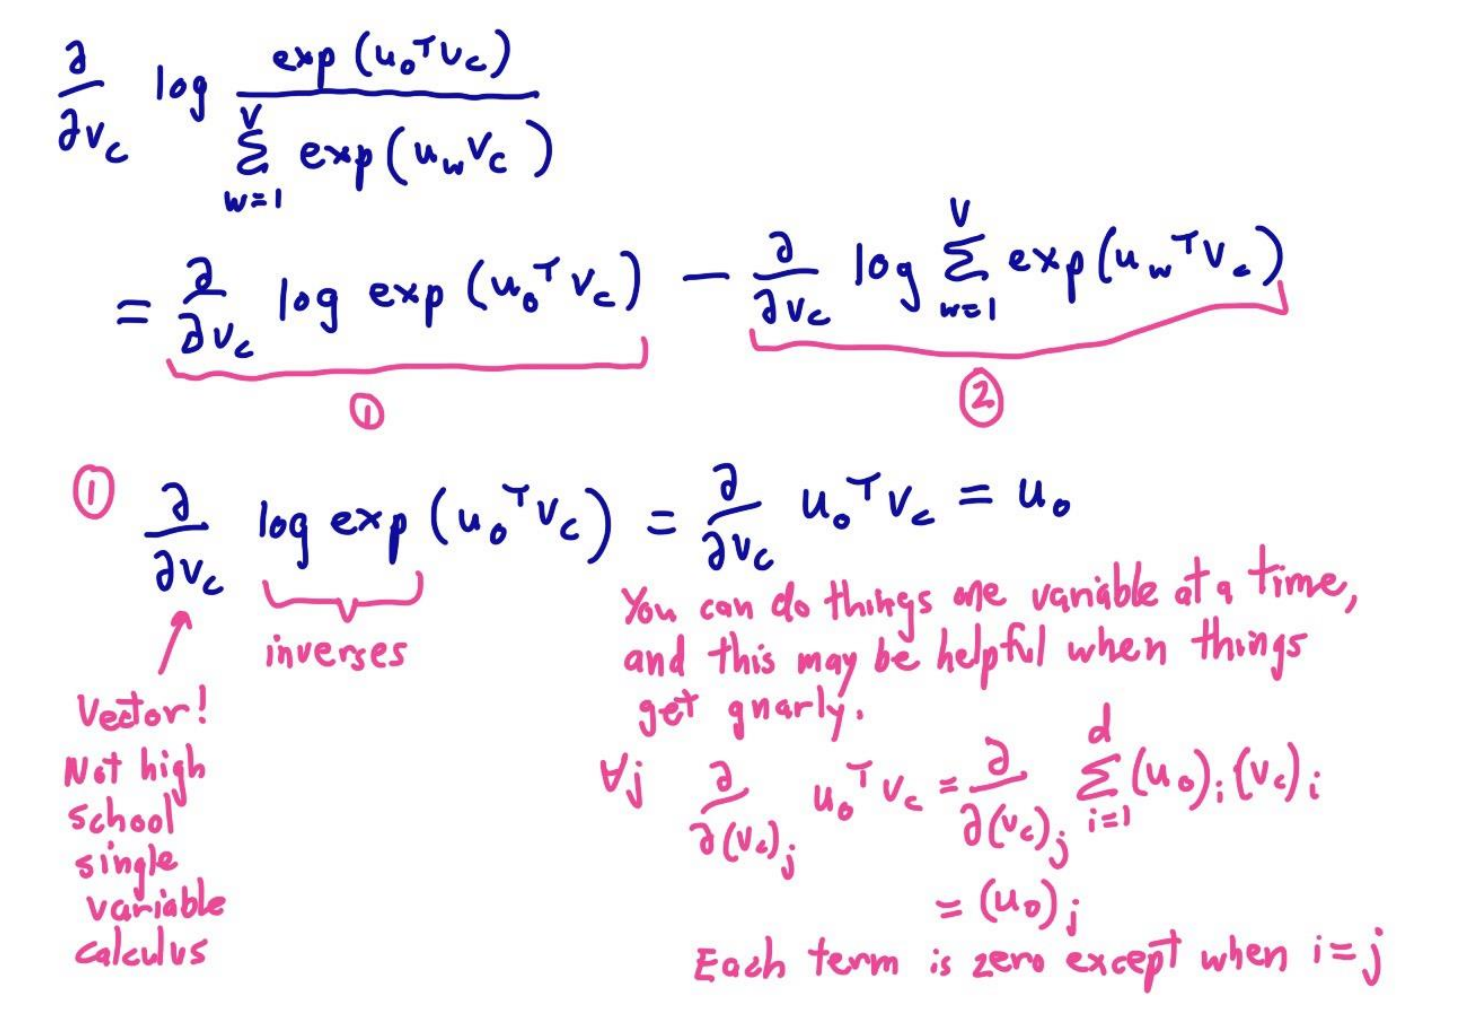

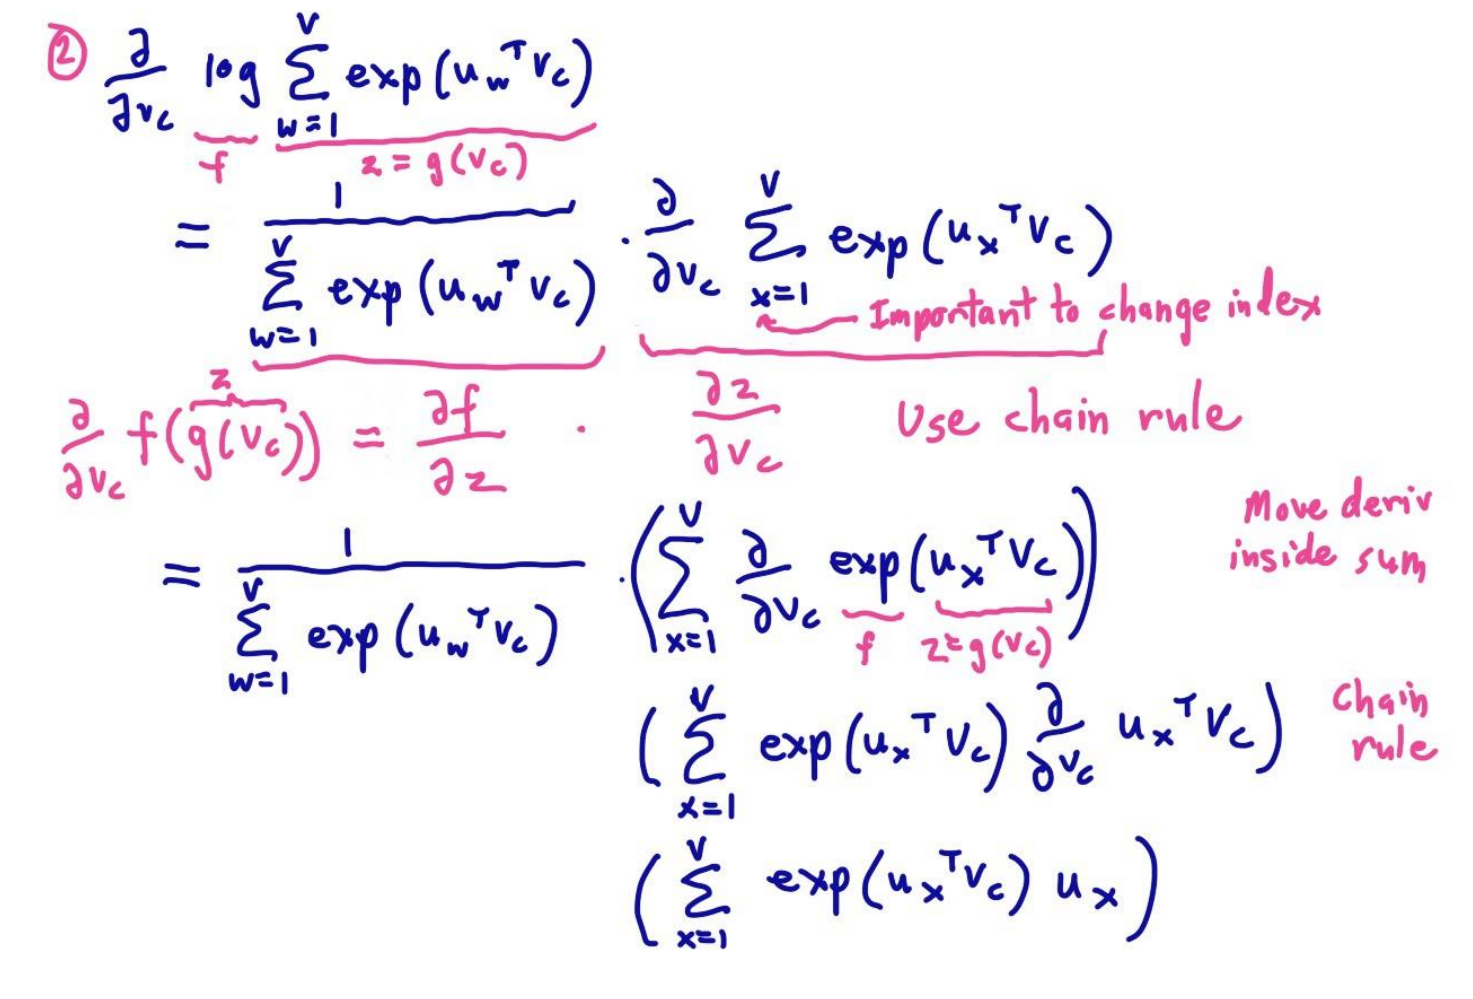

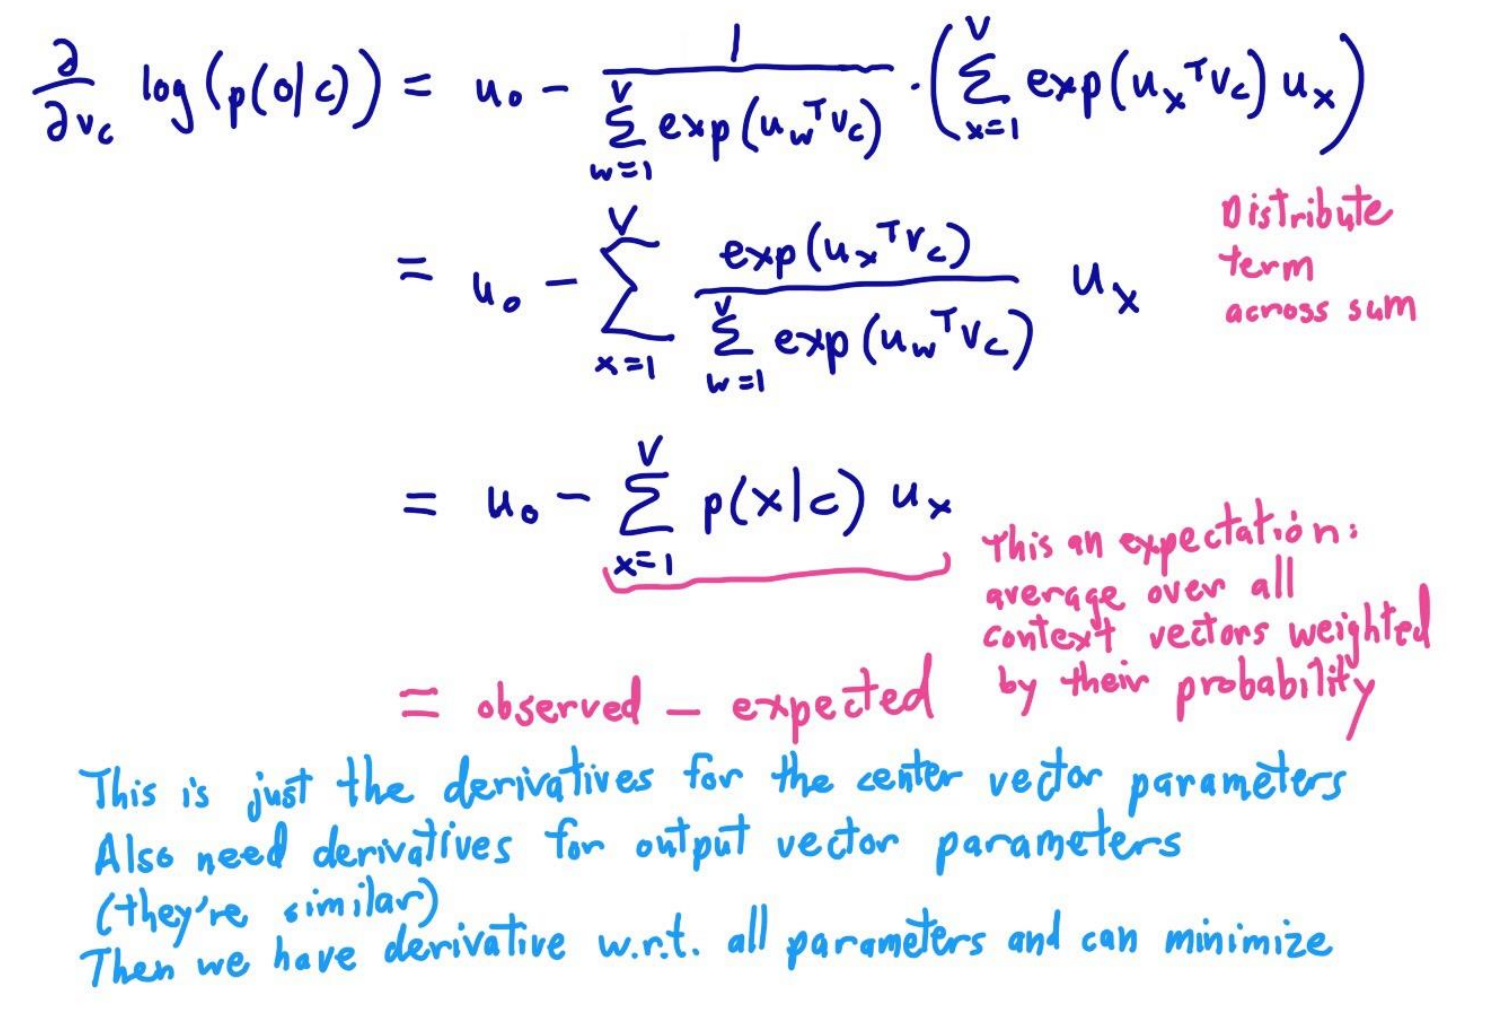